# PCA
本文的参考资料：[StatQuest: Principal Component Analysis (PCA), Step-by-Step](https://www.youtube.com/watch?v=FgakZw6K1QQ) (YouTube 视频)

PCA 的目的是，在尽量少损失有效数据的前提下，尽可能剔除冗余数据。一般冗余数据指的是共线性变量。什么是共线性变量呢？就是两条平行线。下面两条线就是共线性变量。


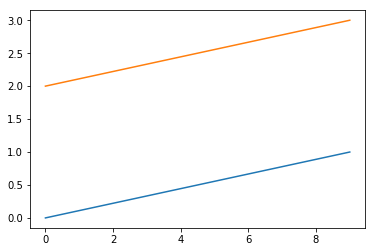

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(10)
ya = np.linspace(0, 1, 10)
yb = np.linspace(2, 3, 10)

plt.plot(x, ya)
plt.plot(x, yb)

首先假设我们只有一个变量：

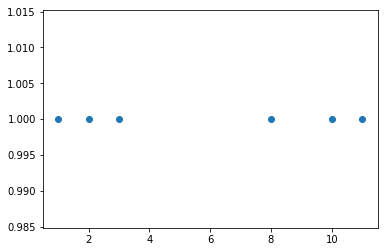

In [2]:
var1 = [10, 11, 8, 3, 2, 1]
y = [1] * 6
plt.scatter(var1, y)

由于时间关系，我就不标注点了。已经可以看出左边三个点是一群，右边三个点是一群。

假如我们多加一组数据，数据集变成了二维：

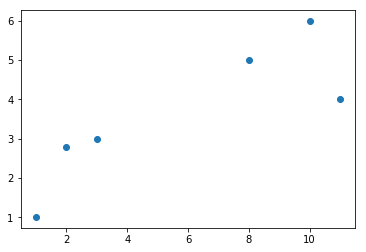

In [3]:
y = [6, 4, 5, 3, 2.8, 1]
plt.scatter(var1,y)

可以看出，左下角的三个点是一群，右上角的三个点是一群。

如果我们的数据有三个变量，可以想象图会是三维的。如果我们有四个以上变量，我们就画不出来了。

PCA 的作用是帮助我们在二维图像中观察到哪些 datapoint 是相互聚集的，还可以告诉我们哪个变量更重要。

为了理解 PCA 的原理，我们还是回到二维数据集。

In [4]:
import pandas as pd
sample_name = ['mouse ' + str(x) for x in list(range(1,7))]
var_name = ['gene 1', 'gene 2']
# 为了与视频一致
df = pd.DataFrame([var1, y], columns=sample_name)
df.index=var_name
df

,mouse 1,mouse 2,mouse 3,mouse 4,mouse 5,mouse 6
gene 1,10,11,8,3,2.0,1
gene 2,6,4,5,3,2.8,1


我们画出点图，画出点在坐标轴上的投影，并且找到这些数值的中心。从此，原始数据就不再需要了。

![](Screenshot 2019-07-07_22-32-25-289.png)
![](Screenshot 2019-07-07_22-33-15-858.png)
![](Screenshot 2019-07-07_22-33-32-193.png)
现在移动图像，让中心（X）位于坐标原点。
![](Screenshot 2019-07-07_22-45-13-903.png)

现在试着用一条线拟合这些点。首先画一条随机的过原点线：
![](Screenshot 2019-07-07_22-48-48-155.png)

为了评估这条线的拟合情况，我们做点在这条线上的投影。
![](Screenshot 2019-07-07_22-50-38-704.png)

然后尝试找到**点到直线投影的距离最小**（即 b，所谓最小二乘法）或**投影到直线上的点到原点的距离最长**（即 c）的拟合直线。根据勾股定理，当 a 一定时，b 和 c 若一个最大，另一个必最小。此时拟合最好。

投影到直线上的点到原点的距离最长的平方和称为**特征向量**。（后面会用到）
![](Screenshot 2019-07-07_22-59-11-210.png)

***为什么需要最小二乘法，为什么最小二乘法的距离最短：***

因为我们想找到拟合最好的那条线，此时点到直线投影的距离最小。

我们尝试转动这条线以得到距离的极值。
![](Screenshot 2019-07-07_23-05-41-803.png)

这条线就叫做主成分 1（PC1）。这意味着在 PC1 上，gene 1 最分散。
![](Screenshot 2019-07-07_23-08-49-056.png)

这条线的斜率是 0.25，意味着向右 4 个单位，向上 1 个单位。所以根据勾股定理，斜边长 $a = \sqrt{4^2 + 1^2} = \sqrt{14} \approx 4.12$。有了 PC1，在原点做 PC1 的垂线即为 PC2。
![](Screenshot 2019-07-07_23-17-31-182.png)

如果还有更多变量，继续在原点做垂线即为 PC3，PC4...（超过三维就画不出来了）

特征向量除以 “元素个数-1” 的值为这个主成分的值。各主成分的值除以主成分值之和即为该主成分占的比重。
![](Screenshot 2019-07-07_23-24-41-772.png)

比如这个例子中，PC1 的值为 15，PC2 的值为 3，那么 PC1 就解释了 $15 / (15+3) = 83\%$的总变量，PC2 解释了 $3 / (15+3) = 17\%$  的总变量。当我们有若干 PC 时，可以只保留总和占 90% 以上的变量（这个阈值因人而异哈）。
![](Screenshot 2019-07-07_23-33-01-238.png)

比如上图，因为 PC1 和 PC2 占了总共 94% 的变量，PC3 可以安全舍弃了。

***PCA 有什么用？***

1. 降维。假如一个机器学习模型包含 20 个变量，而前 15 个变量可以解释超过 90% 的变量，我们可以舍弃后 5 个变量而不明显降低数据的损失度，从而提高机器学习的速度。
2. 聚类。即便 PC1 和 PC2 不足以解释全部变量，我们仍然可以做数据在 PC1 和 PC2 上的投影来观察数据的聚类情况（见下图）。然而此时就不能仅仅降维到 PC1 和 PC2 了。
![](Screenshot 2019-07-07_23-38-43-338.png)